In [99]:
#importing tensor flow,pandas and numpy libraries
import tensorflow as tf
import pandas as pd
import numpy as np


In [100]:
#importing mnist data set using keras api
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [101]:
#checking for nulls
check = pd.Series(y_train)
check.isnull().sum()

0

In [171]:
#checking for nulls
check = pd.Series(y_test)
check.isnull().sum()

0

0


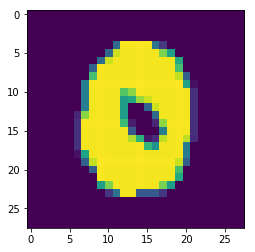

In [105]:
#importing matplotlib library and checking training data
import matplotlib.pyplot as plt
image_index = 4488 #choose any index < = 60000
print(y_train[image_index]) #the label is 0 here
plt.imshow(x_train[image_index])

0


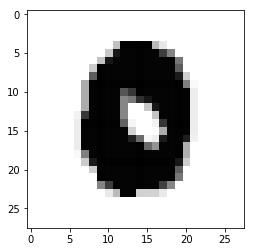

In [106]:
#this is a grey scale image 
image_index = 4488
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

Text(0.5, 0, 'Digits')

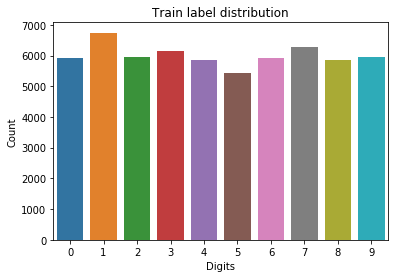

In [107]:
#count of each digit in train
import seaborn as sns
viz_train = sns.countplot(y_train)
viz_train.set_title("Train label distribution")
viz_train.set_ylabel('Count')
viz_train.set_xlabel('Digits')


Text(0.5, 0, 'Digits')

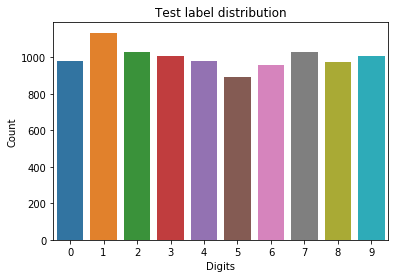

In [108]:
#count of each digit in test
import seaborn as sns
viz_test = sns.countplot(y_test) 
viz_test.set_title("Test label distribution")
viz_test.set_ylabel('Count')
viz_test.set_xlabel('Digits')

In [109]:
#to identify input shape
x_train.shape

(60000, 28, 28)

In [110]:
img_rows=x_train.shape[1]
img_rows
img_cols=x_train.shape[2]
img_cols

28

In [111]:
#our array is 3-dimensional
#in order to use dataset in Keras API, we require 4-dimensional numpy arrays 
#we have to normalize the data by dividing the RGB codes by 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#to get decimal points after division, we convert it into float datatype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalizing
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('No. of images in x_train', x_train.shape[0])
print('No. of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
No. of images in x_train 60000
No. of images in x_test 10000


In [112]:
#importing keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#adding layers to the sequential model
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(35, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) #flatten the 2D arrays to connect to dense layers
model.add(Dense(300, activation=tf.nn.relu))
model.add(Dropout(0.2)) #Dropout layer to deal with overfittin
model.add(Dense(10,activation=tf.nn.softmax))

In [113]:
#the optimizer is RMSprop, the loss function is sparse_categorical_crossentropy and metric is accuracy
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
a=model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/2
60000/60000 [==============================] - 58s 967us/step - loss: 0.1225 - acc: 0.9633
Epoch 2/2
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0474 - acc: 0.9857


In [116]:
#calculating mean of accuracies and losses for all the epochs
a1=np.mean(a.history.get('loss'))
a2=np.mean(a.history.get('acc'))
print(a1,a2)

0.0849484684209383 0.9745


In [117]:
#evaluating the model
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 3s 313us/step


[0.043236515882125966, 0.9869]

7


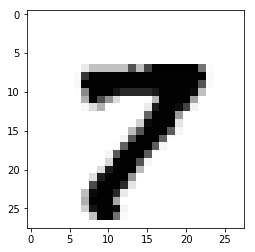

In [120]:
#checking prediction for selected image and validating it with the test image
image_index = 9566
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(y_test[9566])

In [121]:
#creating a table of actual and predicted values
import numpy as np
import pandas as pd
test_pred = model.predict(x_test.reshape(-1, 28, 28, 1))
test_pred = np.argmax(test_pred,axis=1)
test_pred = pd.Series(test_pred,name = "Predicted")
sub = pd.concat([test_pred,pd.Series(y_test,name="Actual")],axis=1)
sub

,Predicted,Actual
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [124]:
#learning curve

In [125]:
#combining train and test data sets
a= np.array(x_train)
b= np.array(x_test)
x_full=np.concatenate((a, b))
x_full.shape 
c= np.array(y_train)
d= np.array(y_test)
y_full=np.concatenate((c, d))
y_full.shape 


(70000,)

In [166]:
##initializing variables
c1 = pd.Series(0,name = "Train size")
c2 = pd.Series(0,name = "Test size")
c3 = pd.Series(0,name = "Train acc")
c4 = pd.Series(0,name = "Test acc")
c5 = pd.Series(0,name= "Train loss")
c6 = pd.Series(0,name= "Test loss")
df = pd.DataFrame([(0,0,0,0,0,0)
                  ],columns=['Train size',
'Test size',
'Train acc',
'Test acc','Train loss','Test loss'])

#splitting the dataset into train and test to build learning curve
for i in np.arange(0.03,1.02,0.03):
    print('i value',i)
    size = x_full.shape[0]
    size1 = int(size*i)
    
    train=x_full[0:(size1)]
    print('x train split',train.shape) 
    test=x_full[(size1):(size)]
    print('x test split',test.shape)
    
    sizey = y_full.shape[0]
    sizey1 = int(sizey*i)
    trainy = y_full[0:(sizey1)]
    print('y train split',trainy.shape)
    testy = y_full[(sizey1):sizey]
    print('y test split',testy.shape)
    
    #using RMSprop optimizer from above
    fit=model.fit(x=train,y=trainy, epochs=10)
    
    train_loss=np.mean(fit.history.get('loss'))
    train_acc=np.mean(fit.history.get('acc'))
    print('training loss',train_loss)
    print('training acc',train_acc)
    
    eva=model.evaluate(test, testy)
    test_loss=eva[0]
    test_acc=eva[1]
    print('testing loss',test_loss)
    print('testing acc',test_acc)
    
    c1[i] = pd.Series(train.shape[0],name = "Train size")
    c2[i] = pd.Series(test.shape[0],name = "Test size")
    c3[i] = pd.Series(train_acc,name = "Train acc")
    c4[i] = pd.Series(test_acc,name = "Test acc")
    c5[i] = pd.Series(train_loss,name= "Train loss")
    c6[i] = pd.Series(test_loss,name= "Test loss")
    
    df1=pd.concat([c1[i],c2[i],c3[i],c4[i],c5[i],c6[i]],axis=1)
    df=df.append(df1)  

i value 0.03
x train split (2100, 28, 28, 1)
x test split (67900, 28, 28, 1)
y train split (2100,)
y test split (67900,)
Epoch 1/10
2100/2100 [==============================] - 3s 1ms/step - loss: 7.4859e-04 - acc: 0.9995
Epoch 2/10
2100/2100 [==============================] - 3s 1ms/step - loss: 3.9058e-04 - acc: 1.0000
Epoch 3/10
2100/2100 [==============================] - 3s 1ms/step - loss: 3.7123e-04 - acc: 1.0000
Epoch 4/10
2100/2100 [==============================] - 3s 1ms/step - loss: 9.7251e-05 - acc: 1.0000
Epoch 5/10
2100/2100 [==============================] - 3s 1ms/step - loss: 1.8869e-04 - acc: 1.0000
Epoch 6/10
2100/2100 [==============================] - 3s 2ms/step - loss: 0.0015 - acc: 0.9990
Epoch 7/10
2100/2100 [==============================] - 4s 2ms/step - loss: 6.6430e-04 - acc: 0.9995
Epoch 8/10
2100/2100 [==============================] - 4s 2ms/step - loss: 6.6622e-05 - acc: 1.0000A: 0s - loss: 7.6087e-05 - acc
Epoch 9/10
2100/2100 [=======================

14700/14700 [==============================] - 26s 2ms/step - loss: 0.0087 - acc: 0.9988
Epoch 5/10
14700/14700 [==============================] - 25s 2ms/step - loss: 0.0073 - acc: 0.9988
Epoch 6/10
14700/14700 [==============================] - 25s 2ms/step - loss: 0.0065 - acc: 0.9988
Epoch 7/10
14700/14700 [==============================] - 25s 2ms/step - loss: 0.0052 - acc: 0.9993
Epoch 8/10
14700/14700 [==============================] - 25s 2ms/step - loss: 0.0049 - acc: 0.9993: 1s - los
Epoch 9/10
14700/14700 [==============================] - 26s 2ms/step - loss: 0.0045 - acc: 0.9993
Epoch 10/10
14700/14700 [==============================] - 25s 2ms/step - loss: 0.0042 - acc: 0.9993
training loss 0.008301840251165314
training acc 0.998673469389377
55300/55300 [==============================] - 37s 666us/step
testing loss 0.11553776214661214
testing acc 0.9874321880650995
i value 0.24
x train split (16800, 28, 28, 1)
x test split (53200, 28, 28, 1)
y train split (16800,)
y test 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



29400/29400 [==============================] - 28s 954us/step - loss: 0.0129 - acc: 0.9988
Epoch 5/10
29400/29400 [==============================] - 28s 954us/step - loss: 0.0157 - acc: 0.9986
Epoch 6/10
29400/29400 [==============================] - 28s 955us/step - loss: 0.0098 - acc: 0.9991
Epoch 7/10
29400/29400 [==============================] - 28s 946us/step - loss: 0.0116 - acc: 0.9989
Epoch 8/10
19424/29400 [==================>...........] - ETA: 9s - loss: 0.0118 - acc: 0.9989

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



31499/31499 [==============================] - 30s 940us/step - loss: 0.0152 - acc: 0.9986
Epoch 5/10
31499/31499 [==============================] - 30s 939us/step - loss: 0.0147 - acc: 0.9985
Epoch 6/10
12512/31499 [==========>...................] - ETA: 17s - loss: 0.0113 - acc: 0.9989

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



31499/31499 [==============================] - 30s 941us/step - loss: 0.0083 - acc: 0.9992
Epoch 9/10
31499/31499 [==============================] - 30s 940us/step - loss: 0.0096 - acc: 0.9991
Epoch 10/10
31499/31499 [==============================] - 30s 945us/step - loss: 0.0084 - acc: 0.9993
training loss 0.012685476754689895
training acc 0.9988031366075114
32320/38501 [========================>.....] - ETA: 2s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



33600/33600 [==============================] - 32s 939us/step - loss: 0.0130 - acc: 0.9986
Epoch 8/10
33600/33600 [==============================] - 32s 941us/step - loss: 0.0110 - acc: 0.9991
Epoch 9/10
33600/33600 [==============================] - 32s 943us/step - loss: 0.0098 - acc: 0.9990
Epoch 10/10
33600/33600 [==============================] - 32s 944us/step - loss: 0.0086 - acc: 0.9991
training loss 0.014566655318933369
training acc 0.9986011904761904
36400/36400 [==============================] - 13s 357us/step
testing loss 0.12116540684983412
testing acc 0.9897527472527472
i value 0.51
x train split (35700, 28, 28, 1)
x test split (34300, 28, 28, 1)
y train split (35700,)
y test split (34300,)
Epoch 1/10
 7648/35700 [=====>........................] - ETA: 26s - loss: 0.0162 - acc: 0.9986

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35700/35700 [==============================] - 34s 943us/step - loss: 0.0132 - acc: 0.99870s - loss: 0.0126 -
Epoch 9/10
35700/35700 [==============================] - 34s 942us/step - loss: 0.0115 - acc: 0.9991
Epoch 10/10
35700/35700 [==============================] - 34s 943us/step - loss: 0.0109 - acc: 0.9990
training loss 0.013682735956926706
training acc 0.9987563025210084
34300/34300 [==============================] - 12s 360us/step
testing loss 0.12192129225602713
testing acc 0.99
i value 0.54
x train split (37800, 28, 28, 1)
x test split (32200, 28, 28, 1)
y train split (37800,)
y test split (32200,)
Epoch 1/10
20960/37800 [===============>..............] - ETA: 15s - loss: 0.0249 - acc: 0.9980 ETA: 15s - loss: 0.0250 - acc: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



37800/37800 [==============================] - 36s 940us/step - loss: 0.0111 - acc: 0.9990
Epoch 10/10
37800/37800 [==============================] - 36s 941us/step - loss: 0.0121 - acc: 0.9989
training loss 0.014541613432056667
training acc 0.9987513227513227
32200/32200 [==============================] - 12s 359us/step
testing loss 0.11930965171707189
testing acc 0.9908385093167702
i value 0.5700000000000001
x train split (39900, 28, 28, 1)
x test split (30100, 28, 28, 1)
y train split (39900,)
y test split (30100,)
Epoch 1/10
39900/39900 [==============================] - 38s 941us/step - loss: 0.0213 - acc: 0.99840s - loss: 0.0205 
Epoch 2/10
11680/39900 [=======>......................] - ETA: 26s - loss: 0.0153 - acc: 0.9987

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



39900/39900 [==============================] - 38s 942us/step - loss: 0.0136 - acc: 0.9989
Epoch 9/10
39900/39900 [==============================] - 38s 943us/step - loss: 0.0150 - acc: 0.9988
Epoch 10/10
39900/39900 [==============================] - 38s 946us/step - loss: 0.0165 - acc: 0.9986
training loss 0.017207926811042672
training acc 0.9986140350877193
30100/30100 [==============================] - 11s 355us/step
testing loss 0.11278481853741554
testing acc 0.9911627906976744
i value 0.6
x train split (42000, 28, 28, 1)
x test split (28000, 28, 28, 1)
y train split (42000,)
y test split (28000,)
Epoch 1/10
11872/42000 [=======>......................] - ETA: 28s - loss: 0.0243 - acc: 0.9977

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



42000/42000 [==============================] - 40s 946us/step - loss: 0.0162 - acc: 0.9987
Epoch 8/10
42000/42000 [==============================] - 40s 941us/step - loss: 0.0147 - acc: 0.9987
Epoch 9/10
42000/42000 [==============================] - 40s 950us/step - loss: 0.0164 - acc: 0.99854s - loss: 0.0158 - ac - ETA: 4s
Epoch 10/10
40800/42000 [============================>.] - ETA: 1s - loss: 0.0140 - acc: 0.9988-

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



44100/44100 [==============================] - 41s 939us/step - loss: 0.0157 - acc: 0.99880s - loss: 0.0158 - acc:
Epoch 7/10
44100/44100 [==============================] - 42s 944us/step - loss: 0.0165 - acc: 0.9988
Epoch 8/10
44100/44100 [==============================] - 42s 945us/step - loss: 0.0165 - acc: 0.9987
Epoch 9/10
24352/44100 [===============>..............] - ETA: 18s - loss: 0.0195 - acc: 0.9986

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



46200/46200 [==============================] - 44s 943us/step - loss: 0.0167 - acc: 0.99862 - ETA: 0s - loss: 0.0170 
Epoch 6/10
46200/46200 [==============================] - 43s 942us/step - loss: 0.0176 - acc: 0.9986
Epoch 7/10
43744/46200 [===========================>..] - ETA: 2s - loss: 0.0189 - acc: 0.9985

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



48299/48299 [==============================] - 45s 941us/step - loss: 0.0225 - acc: 0.9983
Epoch 3/10
48299/48299 [==============================] - 46s 943us/step - loss: 0.0181 - acc: 0.9985
Epoch 4/10
48299/48299 [==============================] - 45s 940us/step - loss: 0.0188 - acc: 0.9986
Epoch 5/10
18912/48299 [==========>...................] - ETA: 27s - loss: 0.0170 - acc: 0.99

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



48299/48299 [==============================] - 46s 942us/step - loss: 0.0163 - acc: 0.9988
Epoch 10/10
48299/48299 [==============================] - 45s 939us/step - loss: 0.0139 - acc: 0.99891s 
training loss 0.0178730413890626
training acc 0.9985879624836954
21701/21701 [==============================] - 8s 364us/step
testing loss 0.10856256593223508
testing acc 0.9913828855813096
i value 0.72
x train split (50400, 28, 28, 1)
x test split (19600, 28, 28, 1)
y train split (50400,)
y test split (19600,)
Epoch 1/10
50400/50400 [==============================] - 47s 942us/step - loss: 0.0215 - acc: 0.9983
Epoch 2/10
 4832/50400 [=>............................] - ETA: 42s - loss: 0.0328 - acc: 0.9977 ETA: 42s - loss: 0.0280 - a

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



50400/50400 [==============================] - 47s 941us/step - loss: 0.0192 - acc: 0.9986
Epoch 6/10
48800/50400 [============================>.] - ETA: 1s - loss: 0.0167 - acc: 0.998

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



50400/50400 [==============================] - 47s 942us/step - loss: 0.0154 - acc: 0.9988
Epoch 9/10
12320/50400 [======>.......................] - ETA: 35s - loss: 0.0191 - acc: 0.9985

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



52500/52500 [==============================] - 49s 941us/step - loss: 0.0202 - acc: 0.9985
Epoch 3/10
44576/52500 [========================>.....] - ETA: 7s - loss: 0.0177 - acc: 0.9987- ETA: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



52500/52500 [==============================] - 49s 941us/step - loss: 0.0178 - acc: 0.99870s - loss: 0.0180 - ac
Epoch 5/10
47328/52500 [==========================>...] - ETA: 4s - loss: 0.0184 - acc: 0.9985

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



52500/52500 [==============================] - 50s 945us/step - loss: 0.0146 - acc: 0.9988
Epoch 9/10
52500/52500 [==============================] - 53s 1ms/step - loss: 0.0190 - acc: 0.9985
Epoch 10/10
13600/52500 [======>.......................] - ETA: 39s - loss: 0.0184 - acc: 0.9983

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



54600/54600 [==============================] - 51s 941us/step - loss: 0.0209 - acc: 0.9983
Epoch 2/10
10016/54600 [====>.........................] - ETA: 42s - loss: 0.0185 - acc: 0.9985

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



54600/54600 [==============================] - 51s 940us/step - loss: 0.0196 - acc: 0.9985
Epoch 6/10
38016/54600 [===================>..........] - ETA: 15s - loss: 0.0148 - acc: 0.9990

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



54600/54600 [==============================] - 51s 943us/step - loss: 0.0166 - acc: 0.9987
Epoch 8/10
26208/54600 [=============>................] - ETA: 26s - loss: 0.0182 - acc: 0.9987

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



54600/54600 [==============================] - 51s 941us/step - loss: 0.0160 - acc: 0.9989
Epoch 10/10
54600/54600 [==============================] - 51s 940us/step - loss: 0.0187 - acc: 0.9986
training loss 0.018234479002713015
training acc 0.9986117216117215
15400/15400 [==============================] - 5s 355us/step
testing loss 0.11038513324805016
testing acc 0.9916233766233766
i value 0.81
x train split (56700, 28, 28, 1)
x test split (13300, 28, 28, 1)
y train split (56700,)
y test split (13300,)
Epoch 1/10
14944/56700 [======>.......................] - ETA: 39s - loss: 0.0182 - acc: 0.9986 ETA: 40s - loss: 0.01 - ETA: 40s - loss: 0.0189 - acc - ETA: 39s - loss: 0.0186

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



30752/56700 [===============>..............] - ETA: 24s - loss: 0.0214 - acc: 0.9984 ETA: 24s - loss: 0.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



56700/56700 [==============================] - 53s 939us/step - loss: 0.0163 - acc: 0.99871s
Epoch 6/10
51296/56700 [==========================>...] - ETA: 5s - loss: 0.0163 - acc: 0.998

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



56700/56700 [==============================] - 53s 942us/step - loss: 0.0179 - acc: 0.9986
Epoch 8/10
25824/56700 [============>.................] - ETA: 29s - loss: 0.0175 - acc: 0.9987

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



58800/58800 [==============================] - 55s 938us/step - loss: 0.0216 - acc: 0.9983
Epoch 2/10
49504/58800 [========================>.....] - ETA: 8s - loss: 0.0189 - acc: 0.9987- ETA: 9s - loss: 0.0190 - acc: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



58800/58800 [==============================] - 55s 938us/step - loss: 0.0166 - acc: 0.99881s - loss: 0
Epoch 4/10
12896/58800 [=====>........................] - ETA: 43s - loss: 0.0203 - acc: 0.9984 ETA: 44s - loss: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



58800/58800 [==============================] - 55s 942us/step - loss: 0.0169 - acc: 0.9988
Epoch 7/10
58800/58800 [==============================] - 55s 939us/step - loss: 0.0150 - acc: 0.9988
Epoch 8/10
32864/58800 [===============>..............] - ETA: 24s - loss: 0.0204 - acc: 0.9984 ETA: 24s - loss: 0.0205 - acc

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



60900/60900 [==============================] - 57s 937us/step - loss: 0.0195 - acc: 0.9986
Epoch 2/10
60900/60900 [==============================] - 57s 940us/step - loss: 0.0185 - acc: 0.9986
Epoch 3/10
60192/60900 [============================>.] - ETA: 0s - loss: 0.0174 - acc: 0.9987- ETA: 2s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



60900/60900 [==============================] - 57s 937us/step - loss: 0.0154 - acc: 0.9989
Epoch 7/10
60900/60900 [==============================] - 57s 940us/step - loss: 0.0168 - acc: 0.9987
Epoch 8/10
60900/60900 [==============================] - 57s 938us/step - loss: 0.0162 - acc: 0.99880s - loss: 0.0161 -
Epoch 9/10
 5536/60900 [=>............................] - ETA: 52s - loss: 0.0178 - acc: 0.9987

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



63000/63000 [==============================] - 59s 937us/step - loss: 0.0229 - acc: 0.9983
Epoch 3/10
63000/63000 [==============================] - 59s 939us/step - loss: 0.0262 - acc: 0.9981
Epoch 4/10
33312/63000 [==============>...............] - ETA: 27s - loss: 0.0229 - acc: 0.9983

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



63000/63000 [==============================] - 59s 938us/step - loss: 0.0203 - acc: 0.99861s - 
Epoch 9/10
63000/63000 [==============================] - 59s 941us/step - loss: 0.0199 - acc: 0.9986 2s  - ETA: 0s - loss: 0.0200 - acc:
Epoch 10/10
11744/63000 [====>.........................] - ETA: 48s - loss: 0.0178 - acc: 0.99

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



65099/65099 [==============================] - 61s 938us/step - loss: 0.0251 - acc: 0.99810s - loss: 0.0252 - acc: 0.
Epoch 4/10
65099/65099 [==============================] - 61s 938us/step - loss: 0.0226 - acc: 0.9984
Epoch 5/10
37184/65099 [================>.............] - ETA: 26s - loss: 0.0239 - acc: 0.9983

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



65099/65099 [==============================] - 61s 937us/step - loss: 0.0200 - acc: 0.9986
Epoch 8/10
65099/65099 [==============================] - 61s 937us/step - loss: 0.0206 - acc: 0.9985
Epoch 9/10
33056/65099 [==============>...............] - ETA: 30s - loss: 0.0225 - acc: 0.9983

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



67200/67200 [==============================] - 63s 939us/step - loss: 0.0194 - acc: 0.99852s - loss: 0.0197 - acc: 0 - ETA: 1s
Epoch 3/10
67200/67200 [==============================] - 63s 939us/step - loss: 0.0208 - acc: 0.9985
Epoch 4/10
22432/67200 [=========>....................] - ETA: 41s - loss: 0.0124 - acc: 0.99

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



67200/67200 [==============================] - 63s 939us/step - loss: 0.0160 - acc: 0.9989
Epoch 8/10
67200/67200 [==============================] - 63s 940us/step - loss: 0.0169 - acc: 0.9988
Epoch 9/10
38304/67200 [================>.............] - ETA: 27s - loss: 0.0160 - acc: 0.9989

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



69300/69300 [==============================] - 65s 940us/step - loss: 0.0171 - acc: 0.9988
Epoch 3/10
69300/69300 [==============================] - 65s 938us/step - loss: 0.0165 - acc: 0.9989
Epoch 4/10
47840/69300 [===================>..........] - ETA: 20s - loss: 0.0185 - acc: 0.99

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



69300/69300 [==============================] - 65s 937us/step - loss: 0.0164 - acc: 0.9988
Epoch 8/10
69300/69300 [==============================] - 65s 938us/step - loss: 0.0158 - acc: 0.9989
Epoch 9/10
35680/69300 [==============>...............] - ETA: 31s - loss: 0.0181 - acc: 0.9986 ETA: 31s - loss: 0.0182 - acc: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [167]:
#summary table of accuracy and losses for each train and test split
df=df[1:df.shape[0]]
df

,Train size,Test size,Train acc,Test acc,Train loss,Test loss
0,2100,67900,0.999762,0.990486,0.000439,0.050355
0,4200,65800,0.999405,0.988085,0.001404,0.081760
0,6300,63700,0.999048,0.986154,0.004393,0.096801
0,8400,61600,0.998381,0.987094,0.010220,0.103610
0,10500,59500,0.998952,0.987950,0.006995,0.098030
0,12600,57400,0.998968,0.987561,0.007878,0.110268
0,14700,55300,0.998673,0.987432,0.008302,0.115538
0,16800,53200,0.998690,0.989079,0.010587,0.105574
0,18900,51100,0.998720,0.989706,0.009084,0.102026
0,21000,49000,0.998990,0.989612,0.008482,0.110940


In [168]:
train_size_lc= df.iloc[:,0:1]
train_size_lc
train_acc_lc= df.iloc[:,2:3]
train_acc_lc
test_acc_lc= df.iloc[:,3:4]
test_acc_lc
train_loss_lc= df.iloc[:,4:5]
train_loss_lc
test_loss_lc= df.iloc[:,5:6]
test_loss_lc

,Test loss
0,0.050355
0,0.081760
0,0.096801
0,0.103610
0,0.098030
0,0.110268
0,0.115538
0,0.105574
0,0.102026
0,0.110940


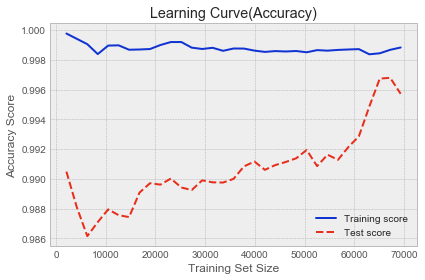

In [169]:
#learning curve for accuracy
plt.style.use('bmh')
plt.plot(train_size_lc, train_acc_lc, color="#1033D2",  label="Training score")
plt.plot(train_size_lc, test_acc_lc, '--', color="#E82E1A",  label="Test score")

#creating plot
plt.title("Learning Curve(Accuracy)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

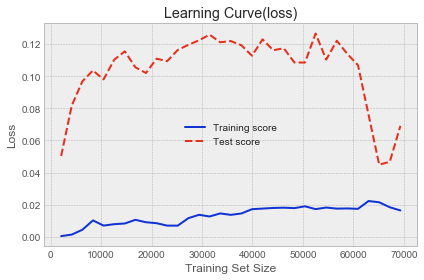

In [170]:
#learning curve for loss
plt.style.use('bmh')
plt.plot(train_size_lc, train_loss_lc, color="#1033D2",  label="Training score")
plt.plot(train_size_lc, test_loss_lc, '--', color="#E82E1A",  label="Test score")

#creating plot
plt.title("Learning Curve(loss)")
plt.xlabel("Training Set Size"), plt.ylabel("Loss"), plt.legend(loc="best")
plt.tight_layout()
plt.show()